In [1]:
import random
import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.02G/2.04G [00:18<00:00, 126MB/s] 
100% 2.04G/2.04G [00:18<00:00, 117MB/s]


In [6]:
!ls

plantvillage-dataset.zip  sample_data


In [7]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [8]:
print(len(os.listdir('plantvillage dataset/color'))) #38 classes
print(os.listdir('plantvillage dataset/color'))

38
['Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___healthy', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___healthy', 'Peach___healthy', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Late_blight', 'Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 'Corn_(maize)___Common_rust_', 'Apple___Black_rot', 'Apple___Apple_scab', 'Tomato___healthy', 'Tomato___Target_Spot', 'Apple___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Squash___Powdery_mildew', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Soybean___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Leaf_Mold', '

(256, 256, 3)


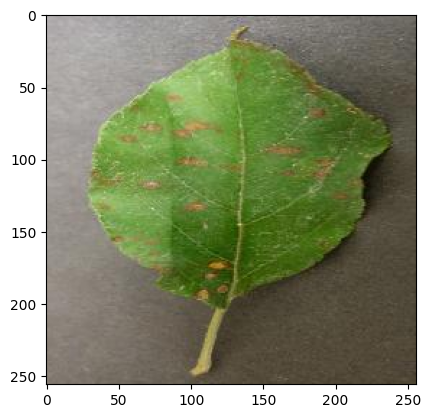

In [9]:
# prompt: display image '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG

import matplotlib.pyplot as plt
img = mpimg.imread('/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG')
plt.imshow(img)

print(img.shape)

In [10]:
# Parameters
base_dir = '/content/plantvillage dataset/color'
img_size = 224
batch_size = 32

In [11]:
# prompt: Train test split

# Split the data into training and validation sets
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [12]:
# prompt: Build CNN

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(38, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [14]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 115s 80ms/step - loss: 0.8910 - accuracy: 0.7425 - val_loss: 0.4026 - val_accuracy: 0.8697
Epoch 2/5
1358/1358 [==============================] - 118s 87ms/step - loss: 0.2771 - accuracy: 0.9112 - val_loss: 0.2838 - val_accuracy: 0.9069
Epoch 3/5
1358/1358 [==============================] - 110s 81ms/step - loss: 0.1280 - accuracy: 0.9577 - val_loss: 0.3377 - val_accuracy: 0.9039
Epoch 4/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.0980 - accuracy: 0.9678 - val_loss: 0.3881 - val_accuracy: 0.8971
Epoch 5/5
1358/1358 [==============================] - 110s 81ms/step - loss: 0.0675 - accuracy: 0.9796 - val_loss: 0.4806 - val_accuracy: 0.8962


339/339 [==============================] - 20s 58ms/step - loss: 0.4806 - accuracy: 0.8962
Test loss: 0.48061540722846985
Test accuracy: 0.8962020874023438


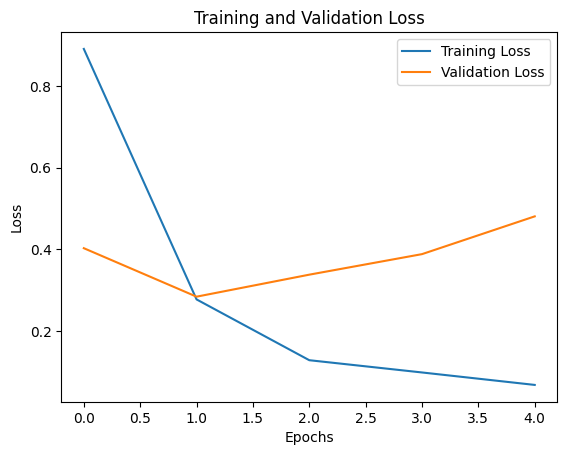

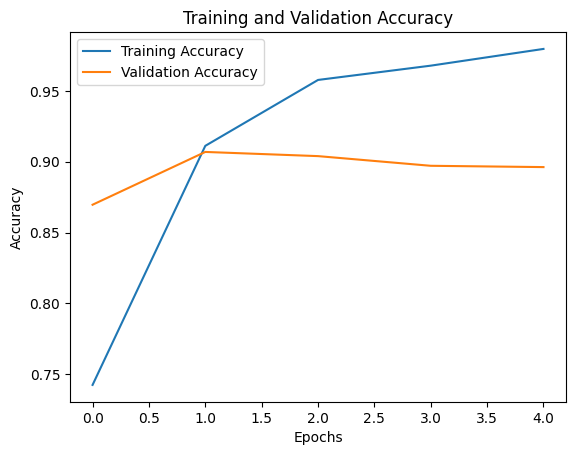

In [16]:
# prompt: Model evaluation

import matplotlib.pyplot as plt
# Evaluate the model on the test data
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
# prompt: best parameters

import numpy as np
# Find the best parameters from the training history
best_epoch = np.argmax(history.history['val_accuracy'])
best_loss = history.history['val_loss'][best_epoch]
best_accuracy = history.history['val_accuracy'][best_epoch]

# Print the best parameters
print('Best Epoch:', best_epoch)
print('Best Loss:', best_loss)
print('Best Accuracy:', best_accuracy)


Best Epoch: 1
Best Loss: 0.2837737202644348
Best Accuracy: 0.9068952798843384


In [18]:
# prompt: save the model

# Save the model to disk
model.save('plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
1358/1358 [==============================] - 110s 80ms/step - loss: 0.9131 - accuracy: 0.7368 - val_loss: 0.3917 - val_accuracy: 0.8744
Epoch 2/2
339/339 [==============================] - 20s 59ms/step - loss: 0.3287 - accuracy: 0.8955
Test loss: 0.3287182152271271
Test accuracy: 0.8954645991325378


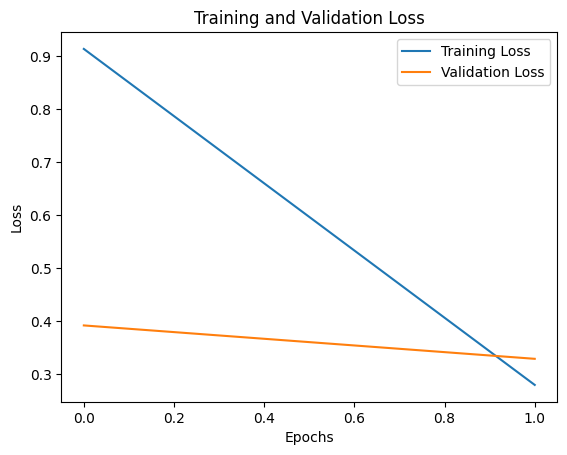

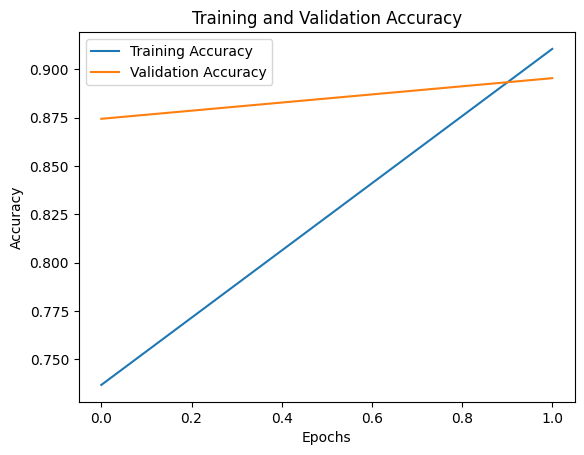

In [19]:
# prompt: Build CNN

best_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(38, activation='softmax')
])

# Compile the Model
best_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
history_best = best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=2,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

# prompt: Model evaluation

import matplotlib.pyplot as plt
# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the training and validation loss
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
# prompt: save the best_model

best_model.save('best_plant_disease_model.h5')
